## Step1 数据生成

分别为线性回归和多项式模型生成数据并可视化: 数据集中共包含8000个样本，每个样本有两个属性。将数据集划分为训练集 (X_train, y_train)和测试集 (X_test, y_test) ，分别包含7200个和800个样本。

First step is to generate data for linear regression/polynomial model and visualize the generated data. We have generated 8000 data examples, each having 2 attributes/features. These data examples are further divided into training set (X_train, y_train) and testing set (X_test, y_test) having 7200 and 800 examples respectively.

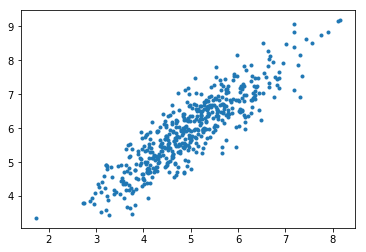

Number of examples in training set =  7200
Number of examples in testing set =  800


In [53]:
# importing dependencies 
import numpy as np 
import matplotlib.pyplot as plt 

# creating data 
mean = np.array([5.0, 6.0]) 
cov = np.array([[1.0, 0.95], [0.95, 1.2]]) 
data = np.random.multivariate_normal(mean, cov, 8000) 

#x = np.arange(8000)
#y = [(i**2+i+2) for i in x]
#for i in np.arange(len(y)):
#    y[i] = y[i]+random.randint(0,10)-3

#x = x.reshape((-1, 1))
#y = np.array(y)
#y =y.reshape((-1, 1))
#data = np.hstack((x,y))

# visualising data 
plt.scatter(data[:500, 0], data[:500, 1], marker = '.') 
plt.show() 


# trainset/testset-split 

#1 线性回归数据集：
data = np.hstack((np.ones((data.shape[0], 1)), data)) #第一列补1
split_factor = 0.90
split = int(split_factor * data.shape[0]) 

X_train = data[:split, :-1] #截取data前split行，前2列
y_train = data[:split, -1].reshape((-1, 1)) #截取data前split行，最后1列
X_test = data[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1)) 

print("Number of examples in training set = % d"%(X_train.shape[0])) 
print("Number of examples in testing set = % d"%(X_test.shape[0])) 

#2 二次多项式数据集：
tmpX = X_train[:,1].reshape((-1, 1)) 
tmpX = tmpX**2
tmpX1 = X_test[:,1].reshape((-1, 1)) 
tmpX1 = tmpX1**2

#print("X_train\n")
#print(X_train[:5, :])
#print("tmpX")
#print(tmpX[:5, :])

X_train1 = np.hstack((X_train, tmpX))
y_train1 = y_train
X_test1 = np.hstack((X_test, tmpX1))
y_test1 = y_test

#print("X_train1\n")
#print(X_train1[:5, :])

#print("y_train1\n")
#print(y_train1[:5, :].reshape((-1, 1)))

## Step2 mini-batch梯度下降法

gradientDescent（）是主函数，其他函数是辅助函数，包括：hypothesis（）用于进行预测，gradient（）用于计算梯度，cost（）计算误差，create_mini_batches（）创建小批量。 gradientDescent（）函数初始化参数，为模型计算最佳的参数集，然后返回这些参数和误差历史记录列表用于参数更新。

In [54]:
# linear regression using "mini-batch" gradient descent 
# function to compute hypothesis / predictions 
def hypothesis(X, theta): 
    return np.dot(X, theta) 

# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 

# function to compute the error for current values of theta 
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 

# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
        if data.shape[0] % batch_size != 0: 
            mini_batch = data[i * batch_size:data.shape[0]] 
            X_mini = mini_batch[:, :-1] 
            Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
            mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 

# function to perform mini-batch gradient descent 
def gradientDescent(X, y, learning_rate = 0.00001, batch_size = 32): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 6
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 

    return theta, error_list 


## Step3 模型训练

调用gradientDescent()函数训练得到模型参数并可视化误差的变化。

### 1 线性回归模型

Bias =  [0.23820553]
Coefficients =  [[1.14538706]]


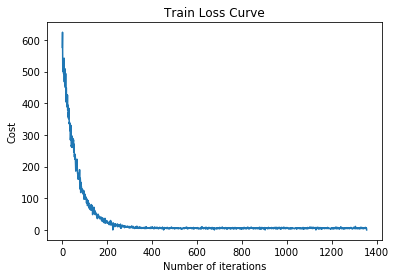

In [55]:
theta, error_list = gradientDescent(X_train, y_train) 
print("Bias = ", theta[0]) 
print("Coefficients = ", theta[1:]) 

# visualising gradient descent 
plt.plot(error_list) 
plt.title("Train Loss Curve")
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

上图为线性回归的代价函数，可以看到，随着迭代次数的增加，误差逐渐接近0

### 2 多项式模型（二次）

Bias =  [0.23820553]
Coefficients1 =  [0.4296312]
Coefficients2 =  [0.13214288]


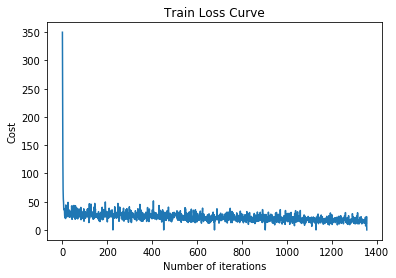

In [56]:
theta1, error_list1 = gradientDescent(X_train1, y_train1) 
print("Bias = ", theta[0]) 
print("Coefficients1 = ", theta1[1]) 
print("Coefficients2 = ", theta1[2]) 
# visualising gradient descent 
plt.plot(error_list1) 
plt.title("Train Loss Curve")
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

上图为使用二次函数拟合数据的误差变化曲线

## Step4 预测

最后，用训练得到的模型，对测试集进行预测，并计算测试误差。

### 1 线性回归模型

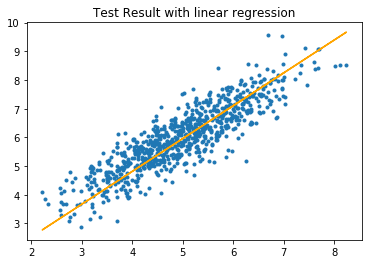

Mean absolute error =  0.4701513152490186


In [51]:
# predicting output for X_test 
y_pred = hypothesis(X_test, theta) 
plt.scatter(X_test[:, 1], y_test[:, ], marker = '.') 
plt.plot(X_test[:, 1], y_pred, color = 'orange') 
plt.title("Test Result with linear regression")
plt.show() 

# calculating error in predictions 
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0]) 
print("Mean absolute error = ", error) 

正常拟合效果图↑

### 2 多项式模型（二次）

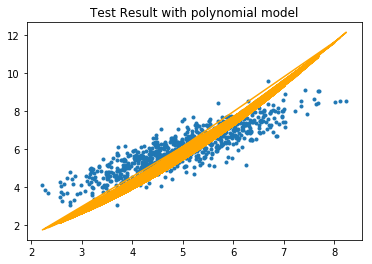

Mean absolute error =  0.8965314342947799


In [52]:
# predicting output for X_test1 
y_pred1 = hypothesis(X_test1, theta1) 
plt.scatter(X_test1[:, 1], y_test1[:, ], marker = '.') 
plt.plot(X_test1[:, 1], y_pred1, color = 'orange') 
plt.title("Test Result with polynomial model")
plt.show()
# calculating error in predictions 
error1 = np.sum(np.abs(y_test1 - y_pred1) / y_test1.shape[0]) 
print("Mean absolute error = ", error1) 

过拟合效果图↑